In [93]:
# importing required libraries
import os
import re
import cv2
import random
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import kagglehub

# Text preprocessing

In [94]:
# downloading the kaggle dataset 
path = kagglehub.dataset_download("eeshawn/flickr30k")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flickr30k


In [95]:
# reading captions file
def read_file(filepath):
    with open(filepath, encoding="utf8") as file:
        return file.read()

In [96]:
# loading and splitting captions
raw_data = read_file("/kaggle/input/flickr30k/captions.txt")
captions = raw_data.strip().split('\n')[1:]  # removing header

print("Total number of captions =", len(captions))
print("Example caption line:", captions[0])

Total number of captions = 158915
Example caption line: 1000092795.jpg,0,Two young guys with shaggy hair look at their hands while hanging out in the yard .


In [97]:
# organizing captions by image id
content = {}

for line in captions:
    parts = line.split(',')

    if len(parts) < 3:
        continue  # skipping malformed lines

    imageID = parts[0].split('.')[0]
    caption = ','.join(parts[2:]).strip()

    if imageID not in content:
        content[imageID] = []

    content[imageID].append(caption)

In [98]:
# example
example_image_id = captions[0].split(',')[0].split('.')[0]
print("Captions for", example_image_id, ":", content[example_image_id])

Captions for 1000092795 : ['Two young guys with shaggy hair look at their hands while hanging out in the yard .', 'Two young  White males are outside near many bushes .', 'Two men in green shirts are standing in a yard .', 'A man in a blue shirt standing in a garden .', 'Two friends enjoy time spent together .']


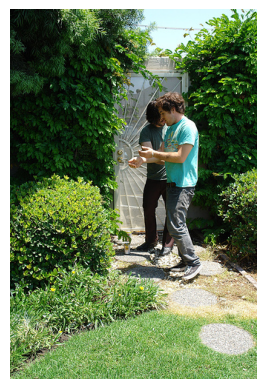

Two young guys with shaggy hair look at their hands while hanging out in the yard .
Two young  White males are outside near many bushes .
Two men in green shirts are standing in a yard .
A man in a blue shirt standing in a garden .
Two friends enjoy time spent together .


In [99]:
# example
IMG_PATH = "/kaggle/input/flickr30k/flickr30k_images/"
image_id = captions[0].split(',')[0].split('.')[0]

img = cv2.imread(IMG_PATH + image_id + ".jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

# printing all captions for the selected image
for caption in content[image_id]:
    print(caption)

In [100]:
# cleaning captions
def clean(text):
    text = text.lower()
    return re.sub("[^a-z]+", " ", text)

In [101]:
# example
print(clean("A man in green holds a guitar while the other man observes his shirt ."))

a man in green holds a guitar while the other man observes his shirt 


In [102]:
# applying cleaning to all captions
for ID, captions_list in content.items():
    content[ID] = [clean(caption) for caption in captions_list]

In [103]:
# result
print("Cleaned caption:", content[image_id][-1])

Cleaned caption: two friends enjoy time spent together 


In [104]:
# saving cleaned captions to a file
with open("/kaggle/working/tokens_clean.txt", "w") as file:
    file.write(str(content))

# Dataset summary

In [105]:
images_dir = "/kaggle/input/flickr30k/flickr30k_images"
images = os.listdir(images_dir)
print("Number of images in dataset:", len(images))

Number of images in dataset: 31783


In [106]:
# creating dataframe for captions

datatxt = []
for imageID, captions_list in content.items():
    for idx, caption in enumerate(captions_list):
        datatxt.append([imageID + ".jpg", idx, caption])

df_txt_flickr = pd.DataFrame(datatxt, columns=["filename", "index", "caption"])

unique_filenames = np.unique(df_txt_flickr.filename.values)
print("Total number of unique filenames:", len(unique_filenames))

Total number of unique filenames: 31783


In [107]:
# analyzing word frequency
def df_word(df_txt):
    vocabulary = []
    for caption in df_txt["caption"]:
        vocabulary.extend(caption.split())

    print('Total vocabulary size:', len(set(vocabulary)))

    word_counts = Counter(vocabulary)
    dfword = pd.DataFrame({
        "word": list(word_counts.keys()),
        "count": list(word_counts.values())
    })

    dfword = dfword.sort_values("count", ascending=False).reset_index(drop=True)
    return dfword

dfword = df_word(df_txt_flickr)
dfword.head()

Total vocabulary size: 18084


,word,count
0,a,271741
1,in,83520
2,the,62985
3,on,45686
4,and,44299
